In [1]:
import sys
sys.path.append("../PythonScripts")
from ML_utils import preprocess
from sklearn.decomposition import PCA
import synapseclient as sc
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


sns.set_style("dark")
np.random.seed(100)
%matplotlib inline

In [2]:
syn = sc.login()

Welcome, aryton tediarjo!



In [3]:
def rename_column_name(data,collapse_type):
    for feature in filter(lambda feature: ("x" in feature) 
                          or ("y" in feature) or ("z" in feature) 
                          or ("AA" in feature), data.columns): 
        data  = data.rename({feature: "{}_{}"\
                            .format(collapse_type, feature)}, axis = 1)
    return data

In [45]:
entityV1 = syn.get("syn21046180")
dataV1   = pd.read_csv(entityV1["path"], index_col = 0)
entityV2 = syn.get("syn21046181")
dataV2   = pd.read_csv(entityV2["path"], index_col = 0)
entityPassive = syn.get("syn21046184")
dataPassive   = pd.read_csv(entityPassive["path"], index_col = 0)

In [46]:
dataV1 = preprocess(dataV1, True)
dataV1["version"] = "V1"
dataV2 = preprocess(dataV2, True)
dataV2["version"] = "V2"
dataPassive = preprocess(dataPassive, True)
dataPassive["version"] = "Passive"

[WARNING] C:\Users\atedi\OneDrive\Documents\SageBionetworks\synapse\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)



In [47]:
data = pd.concat([dataV1, dataV2]).reset_index(drop = True)

[WARNING] C:\Users\atedi\OneDrive\Documents\SageBionetworks\synapse\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.



# PCA

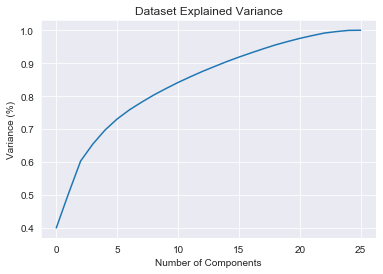

In [26]:
scaler = StandardScaler()
X = data[[feat for feat in data.columns if ("." in feat)]]
y = data[["version", "PD"]]
X_scaled = scaler.fit_transform(X)
#Plotting the Cumulative Summation of the Explained Variance
pca = PCA().fit(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.grid()
plt.show()

In [28]:
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data = principal_comp)
principal_df = pd.concat([principal_df, y], axis = 1)

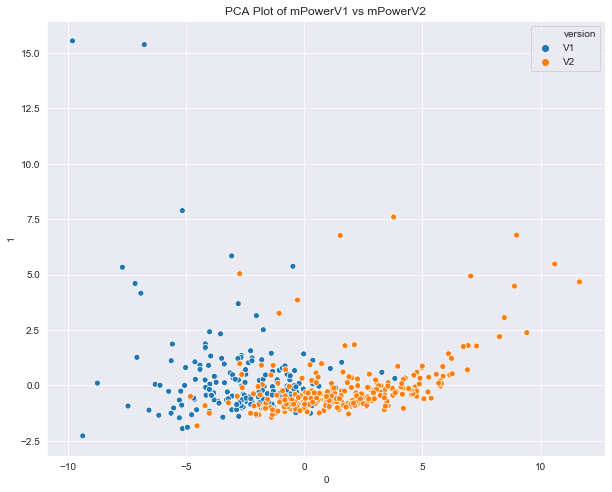

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot(principal_df[0], principal_df[1], 
                hue = principal_df["version"])
plt.title("PCA Plot of mPowerV1 vs mPowerV2")
plt.grid()
plt.show()

# Isolated Feature healthCodes

In [51]:
male_PD_data = data[(data["gender"] == "male") & (data["PD"] == 1)].reset_index(drop = True)

In [52]:
X = male_PD_data[[feat for feat in male_PD_data.columns if ("." in feat)]]
y = male_PD_data[["version", "PD"]]
X_scaled = scaler.fit_transform(X)


#Plotting the Cumulative Summation of the Explained Variance
pca = PCA().fit(X_scaled)
pca = PCA(n_components = 3)
principal_comp = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data = principal_comp)
principal_df = pd.concat([principal_df, y], axis = 1)

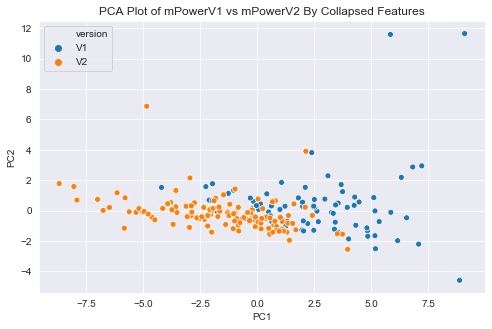

In [56]:
plt.figure(figsize=(8,5))
sns.scatterplot(principal_df[0], principal_df[1], 
                hue = principal_df["version"])
plt.title("PCA Plot of mPowerV1 vs mPowerV2 By Collapsed Features")
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.grid()
plt.show()

# Is the feature values in V2 biased?
Looking from the values in the Principal Component Plot, we can see that there are some cluster between the versions the mPower data, now we will compare by stratifying those who has parkinson, we will see if each features are actually different across the versions. An dependent t-test will be hold to compare the two means. 

In [170]:
def plot_distribution(data):
    for i in [i for i in data.columns if ("x" in i) or ("y" in i) or ("z" in i) or ("AA" in i)]:
        V1 = data[data["version"] == "V1"][i].dropna()
        V2 = data[data["version"] == "V2"][i].dropna()
#         Passive = data[data["version"] == "Passive"][i].dropna()
        fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
        sns.distplot(V1, label = "V1", kde_kws={"shade": True}, hist = False, ax = axes[0])
        sns.distplot(V2, label = "V2", kde_kws={"shade": True}, hist = False, ax = axes[0])
        sns.distplot(Passive, label = "Passive", kde_kws={"shade": True}, hist = False, ax = axes[0])
        sns.boxplot(x = "version", y = i, data = data, ax = axes[1], orient = "v")
        axes[0].set_title("p-values: {}".format(ttest_ind(V1, V2)[1]))
        axes[0].grid()
        axes[1].grid()
        plt.show()

In [171]:
PD_grouped = grouped_data[grouped_data["PD"] == 1]

In [172]:
PD_grouped

,max_x.no_of_steps,max_x.gait_step_regularity,max_x.gait_stride_regularity,max_x.gait_symmetry,max_x.frequency_of_peaks,max_x.max_freeze_index,max_x.freeze_occurences,max_x.speed_of_gait,max_y.no_of_steps,max_y.gait_step_regularity,...,max_AA.no_of_steps,max_AA.gait_step_regularity,max_AA.gait_stride_regularity,max_AA.gait_symmetry,max_AA.frequency_of_peaks,max_AA.max_freeze_index,max_AA.freeze_occurences,max_AA.speed_of_gait,PD,version
0,21.0,0.970228,1.0,0.171369,3.084409e+03,68.855484,39.0,0.594427,20.0,0.957758,...,11.0,1.0,1.0,0.248645,97816.459501,35.256336,30.0,0.531395,1,V1
7,26.0,1.000000,1.0,0.181596,6.757768e+04,52.111069,25.0,0.408861,23.0,1.000000,...,21.0,1.0,1.0,0.200407,3547.608437,12.261449,21.0,0.311144,1,V1
9,25.0,1.000000,1.0,0.109256,2.395279e+03,21.961264,44.0,0.134518,18.0,1.000000,...,15.0,1.0,1.0,0.289806,6078.673506,2.779339,4.0,0.196961,1,V1
10,30.0,1.000000,1.0,0.221617,2.875921e+04,141.451645,55.0,0.186447,30.0,1.000000,...,13.0,1.0,1.0,0.175391,5194.956586,6.177542,11.0,0.237680,1,V1
13,27.0,1.000000,1.0,0.317302,1.677722e+07,28.548513,46.0,0.209108,30.0,1.000000,...,27.0,1.0,1.0,0.318767,46192.560475,12.532166,26.0,0.249379,1,V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,58.0,1.000000,1.0,0.304280,1.005627e+05,7397.779297,55.0,0.441486,61.0,1.000000,...,50.0,1.0,1.0,0.296808,617590.188232,204.490936,55.0,0.351846,1,Passive
360,27.0,1.000000,1.0,0.066771,1.199875e+03,24.660767,44.0,0.273303,35.0,1.000000,...,20.0,1.0,1.0,0.141370,1608.054839,2.206186,1.0,0.371205,1,Passive
361,54.0,1.000000,1.0,0.295491,1.439689e+04,83.785187,55.0,0.363830,55.0,1.000000,...,34.0,1.0,1.0,0.268994,269540.606008,24.609310,43.0,0.418623,1,Passive
362,53.0,1.000000,1.0,0.273530,2.945618e+06,128.659683,55.0,0.404913,55.0,1.000000,...,29.0,1.0,1.0,0.326751,35374.325876,27.272717,7.0,0.391853,1,Passive


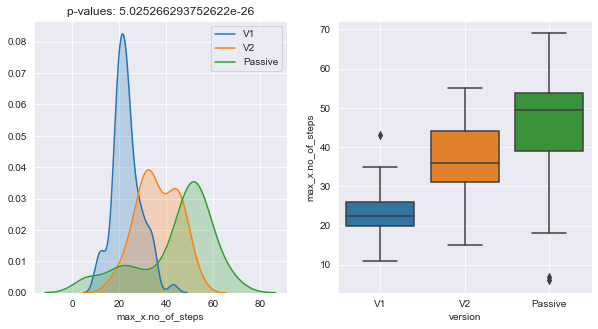

[WARNING] C:\Users\atedi\OneDrive\Documents\SageBionetworks\synapse\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)

[WARNING] C:\Users\atedi\OneDrive\Documents\SageBionetworks\synapse\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2



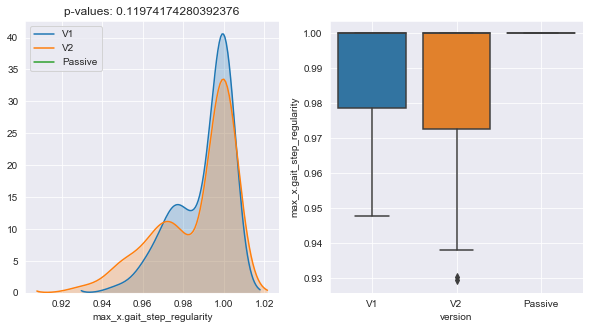

[WARNING] C:\Users\atedi\OneDrive\Documents\SageBionetworks\synapse\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)

[WARNING] C:\Users\atedi\OneDrive\Documents\SageBionetworks\synapse\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2



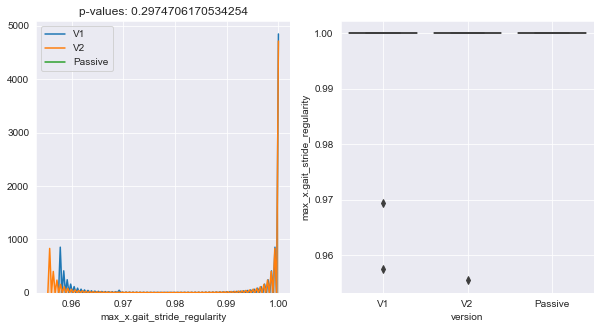

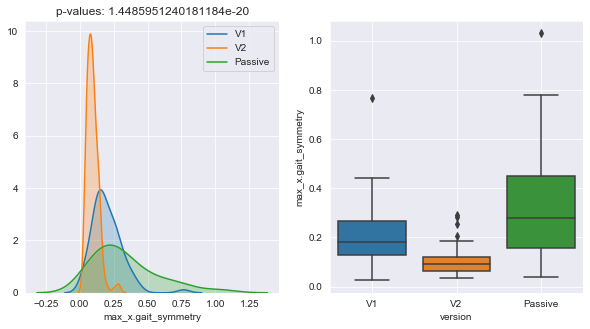

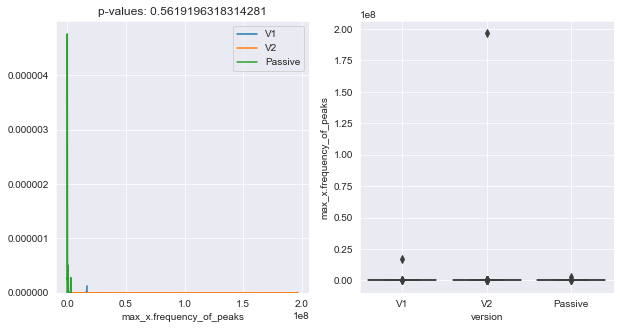

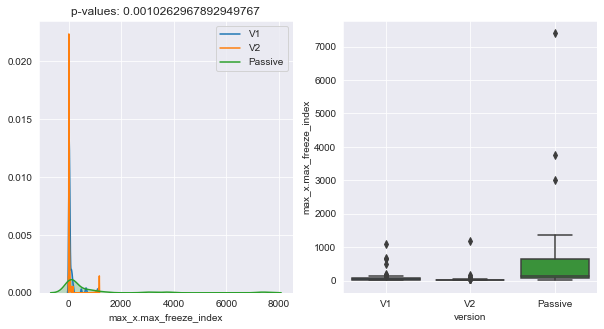

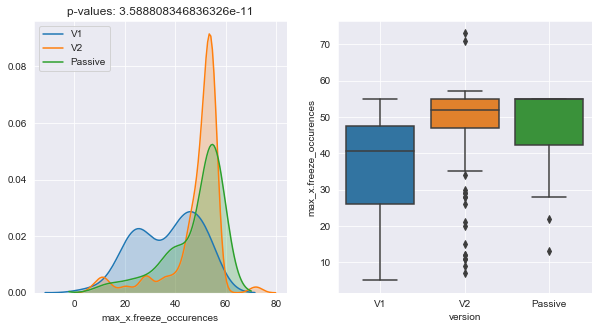

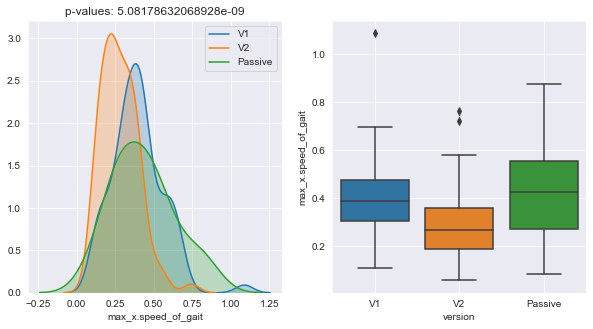

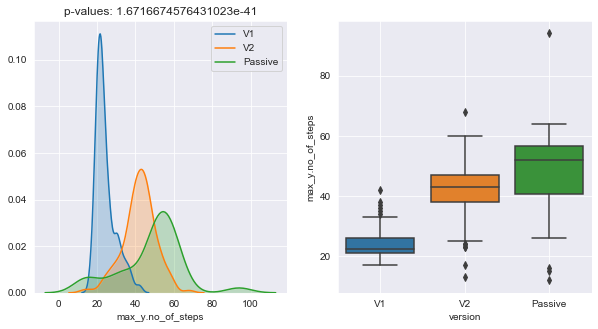

[WARNING] C:\Users\atedi\OneDrive\Documents\SageBionetworks\synapse\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)

[WARNING] C:\Users\atedi\OneDrive\Documents\SageBionetworks\synapse\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2



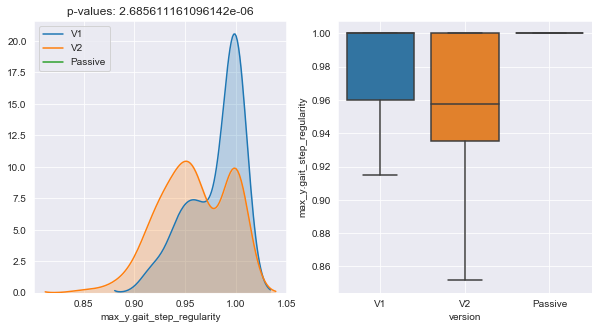

[WARNING] C:\Users\atedi\OneDrive\Documents\SageBionetworks\synapse\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)

[WARNING] C:\Users\atedi\OneDrive\Documents\SageBionetworks\synapse\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2



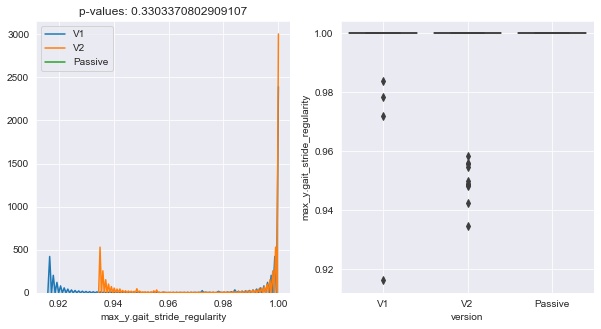

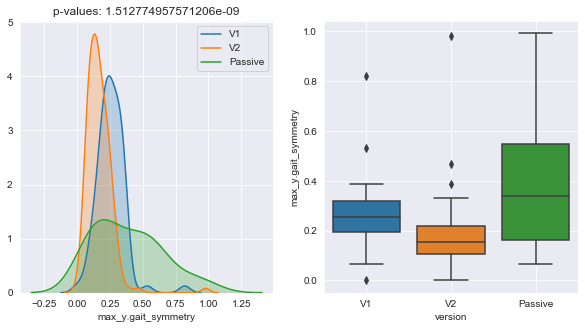

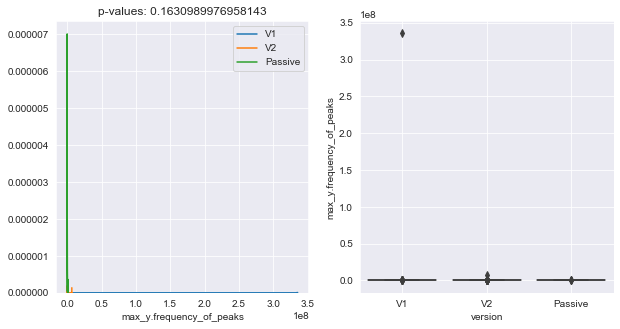

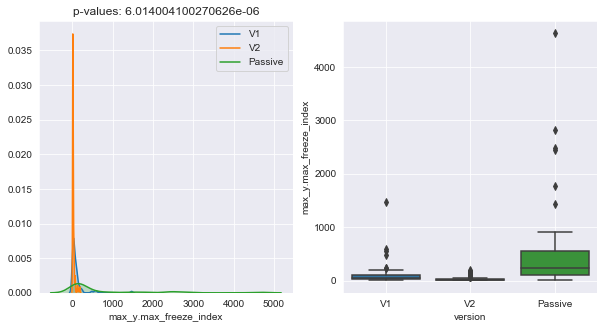

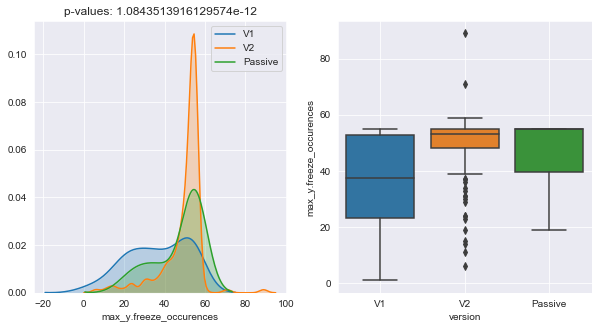

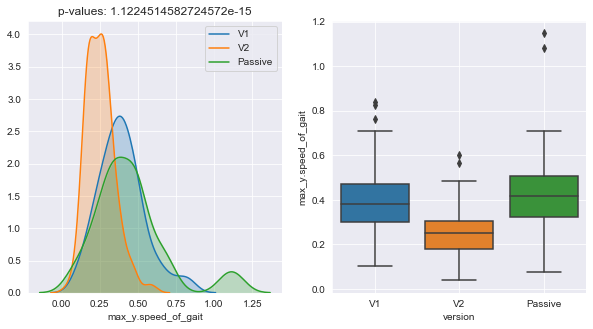

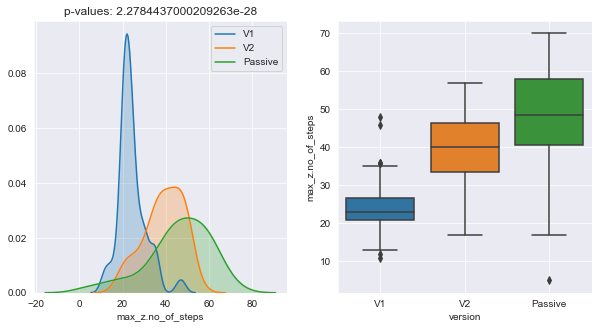

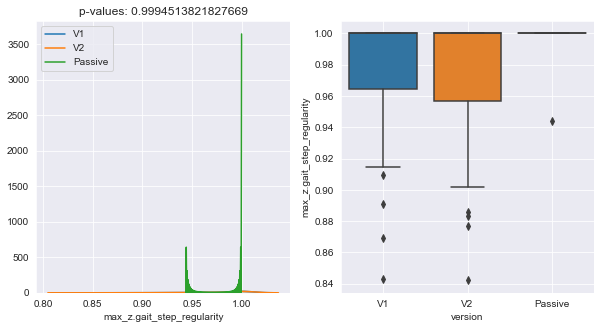

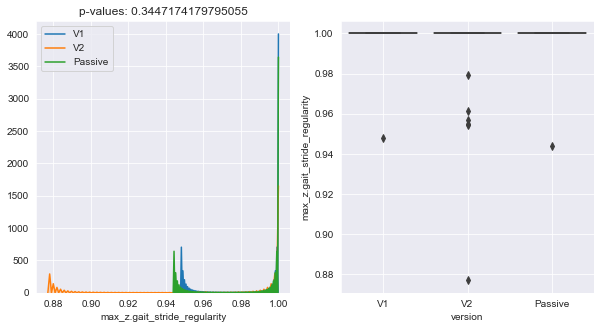

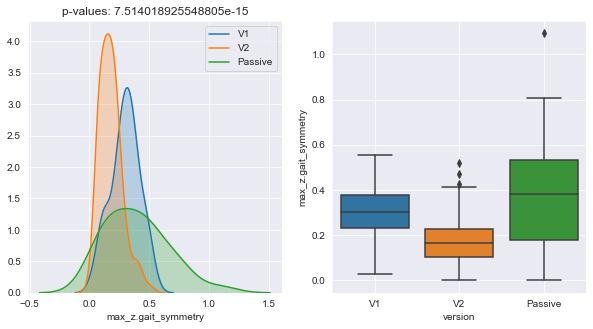

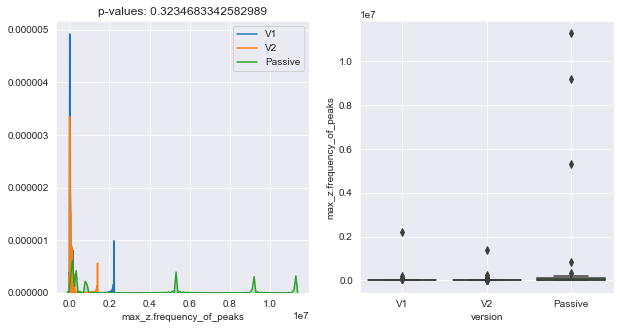

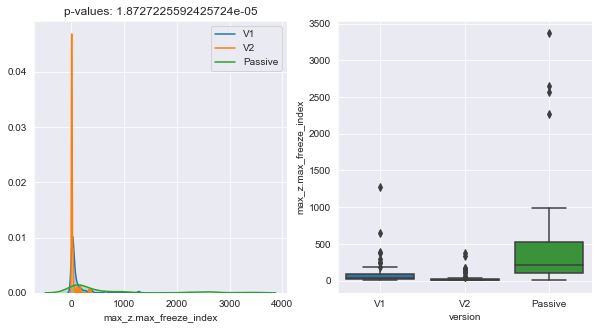

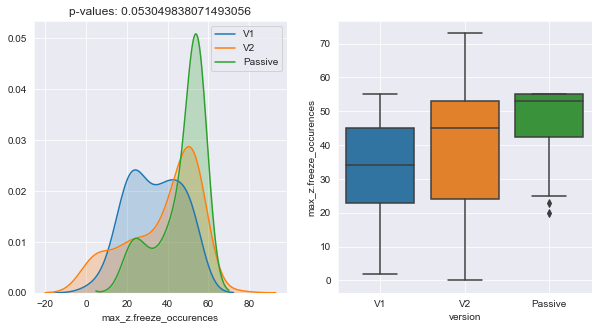

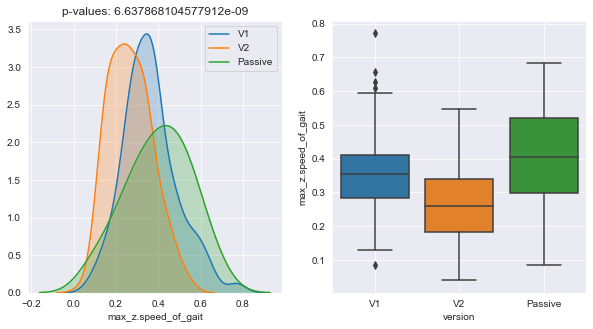

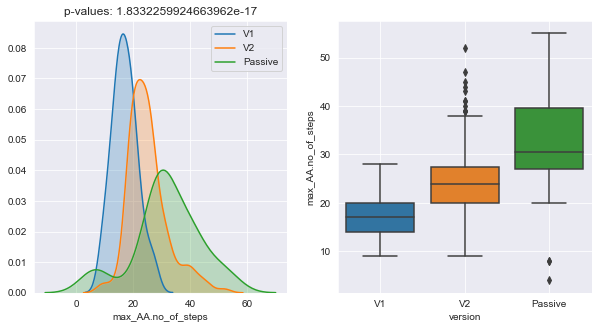

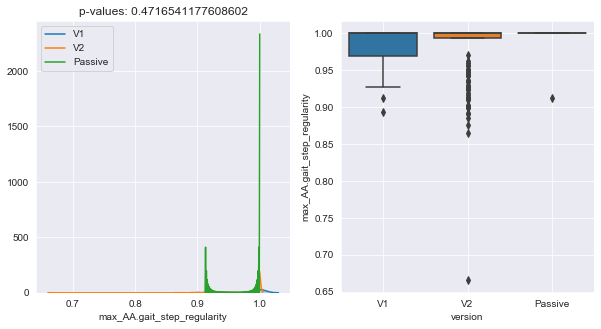

[WARNING] C:\Users\atedi\OneDrive\Documents\SageBionetworks\synapse\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)

[WARNING] C:\Users\atedi\OneDrive\Documents\SageBionetworks\synapse\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2



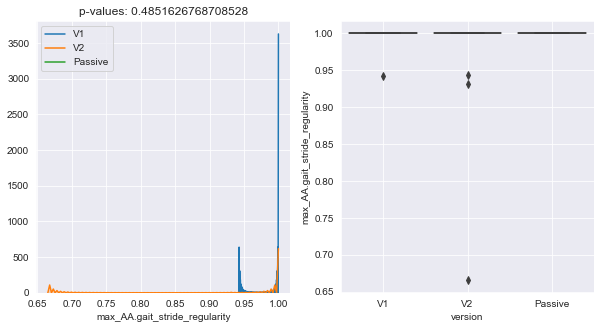

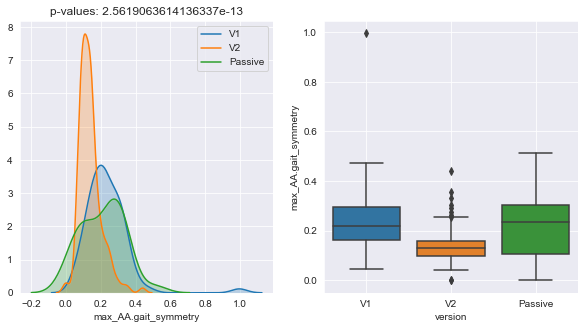

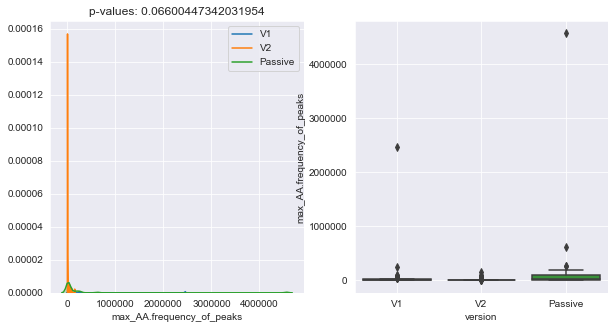

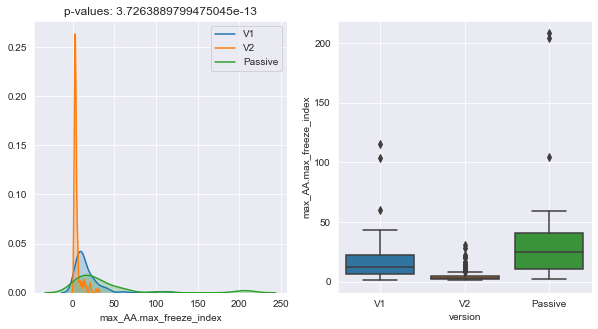

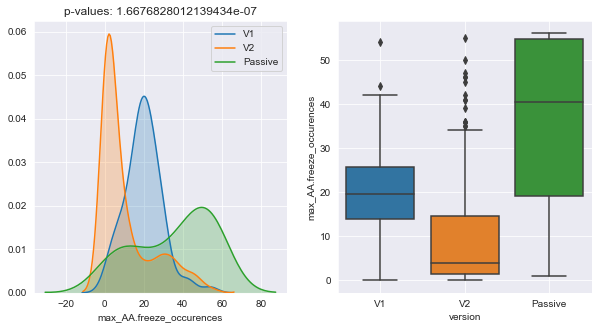

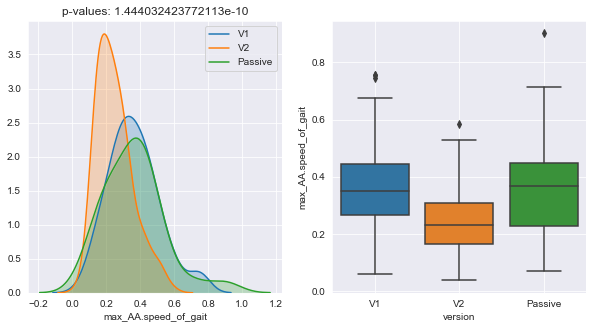

In [173]:
plot_distribution(PD_grouped)

# T-Sne

In [126]:
X_embedded = TSNE(n_components=2).fit_transform(X_scaled)

In [127]:
tSNE_df = pd.DataFrame(data = X_embedded)
tSNE_df = pd.concat([tSNE_df, data[["version", "PD"]]], axis = 1)

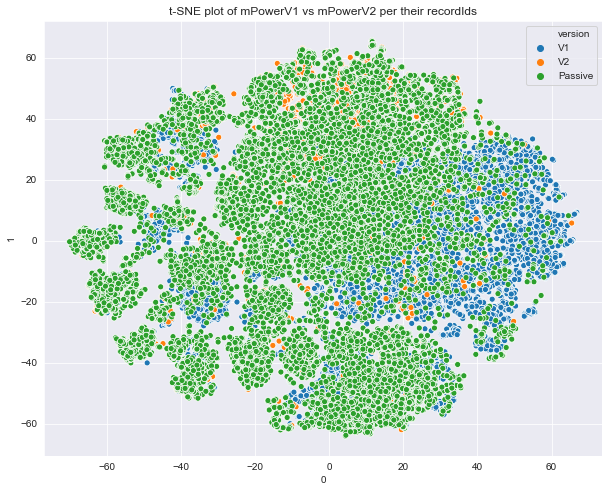

In [128]:
plt.figure(figsize=(10,8))
sns.scatterplot(tSNE_df[0], tSNE_df[1], hue = tSNE_df["version"])
plt.title("t-SNE plot of mPowerV1 vs mPowerV2 per their recordIds")
plt.grid()
plt.show()